In [1]:
# IMDB 리뷰 데이터 셋
from tensorflow.keras.datasets import imdb

(train_input, train_target),(test_input, test_target) = imdb.load_data(num_words=500) # skip_top=20
# num_words=500는 500단어까지만 끊었음
# skip_top - 1~20위까지는 생략

In [2]:
print(train_input.shape, test_input.shape) # 데이터의 의미를 정확하게 파악

(25000,) (25000,)


In [3]:
print(len(train_input[0]), len(train_input[1])) # 첫번째 댓글은 218단어, 두번째 189단어

218 189


In [4]:
print(train_input[0]) # 단어 빈도수 순위(top 20을 배제한)

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
print(train_target[:20]) # 1번은 긍정, 0번은 부정. 그래서 softmax는 필요없게 된다.

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [6]:
# 훈련 세트에서 2(어휘 사전에 없는 단어) 제외하기
for i in range(len(train_input)):
    train_input[i] = [w for w in train_input[i] if w > 2] # 단어 218번만큼 반복

print(train_input[0])

[14, 22, 16, 43, 65, 458, 66, 4, 173, 36, 256, 5, 25, 100, 43, 112, 50, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 336, 385, 39, 4, 172, 17, 38, 13, 447, 4, 192, 50, 16, 6, 147, 19, 14, 22, 4, 469, 4, 22, 71, 87, 12, 16, 43, 38, 76, 15, 13, 4, 22, 17, 17, 12, 16, 18, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 16, 480, 66, 33, 4, 130, 12, 16, 38, 5, 25, 124, 51, 36, 135, 48, 25, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 8, 4, 107, 117, 15, 256, 4, 7, 5, 36, 71, 43, 476, 26, 400, 317, 46, 7, 4, 13, 104, 88, 4, 381, 15, 297, 98, 32, 56, 26, 141, 6, 194, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 88, 12, 16, 283, 5, 16, 113, 103, 32, 15, 16, 19, 178, 32]


In [7]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = \
train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [8]:
import numpy as np

lengths = np.array([len(x) for x in train_input])

In [9]:
print(np.mean(lengths), np.median(lengths))

164.67985 126.0


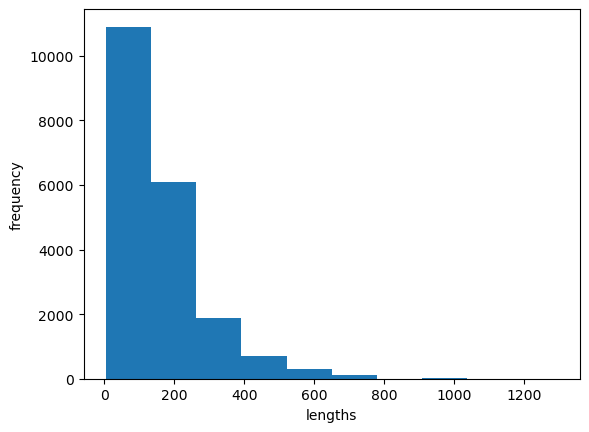

In [10]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('lengths')
plt.ylabel('frequency')
plt.show()

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100) 
# 100글자 이후만 남기고 나머지 글자는 싹 다 지워버림.
# maxlen - 218개를 100개로 잘라버림
# padding='pre'('post') maxlen에서 자른 것을 0으로 채워줌.
train_seq.shape

(20000, 100)

In [12]:
train_seq[5] 

# 숫자들은 범주형(남자1, 여자2 ...와 같은) 
# 49번째 영어단어, 19번째 영어단어라고 함. 유니코드화하여 정수화시킴 
#100개의 단어를 가지고 있다..

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 195,
        19,  49, 190,   4, 352, 183,  10,  10,  13,  82,  79,   4,  36,
        71, 269,   8,  25,  19,  49,   7,   4,  10,  10,  48,  25,  40,
        11,  40,   5,   4,  95,  14, 238,  56, 129,  10,  10,  21,  94,
       364, 352,  11, 190,  24, 484,   7,  94, 205, 405,  10,  10,  87,
        34,  49,   7, 290,  46,  48,  64,  18,   4])

In [13]:
val_seq = pad_sequences(val_input, maxlen=100)
train_seq.shape

(20000, 100)

# 순환 신경망 만들기

In [14]:
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
# 신경망 - Dense, CNN - Conv2D, RNN - RimpleRNN()
# default가 tahn으로 -1~1로 해놔서 달아놓을 필요 없다.
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [15]:
train_oh = keras.utils.to_categorical(train_seq)
train_oh.shape # (20000데이터, 100글자, 500인덱스로 펼쳐줌)

(20000, 100, 500)

In [16]:
val_oh = keras.utils.to_categorical(val_seq)
val_oh.shape # (20000데이터, 100글자, 500인덱스로 펼쳐줌)

(5000, 100, 500)

In [17]:
val_oh[0:2]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [19]:
print(1e-4)

0.0001


In [20]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4), loss='binary_crossentropy', metrics='accuracy') 
# RMSprop은 디폴트값을 정해줄 수 있음.
# learning_rate = 1e-4 = 0.0001

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simpleRNN-Model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True) 

history = model.fit(train_oh, train_target, epochs=200, batch_size=64, validation_data=(val_oh, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb]) 
# batch_size=64 - 64씩 읽어오라는 것.
# batch_size만큼 가져와서 validation_data로 검증도 같이함.
# history - 정확도 값을 담아줌
# patience=3 - 3번이상 커지면 멈춰라! # patience의 기준은 val_loss

Epoch 1/200
313/313 [==============================] - 7s 19ms/step - loss: 0.6982 - accuracy: 0.5078 - val_loss: 0.6958 - val_accuracy: 0.5050
Epoch 2/200
313/313 [==============================] - 6s 18ms/step - loss: 0.6889 - accuracy: 0.5393 - val_loss: 0.6842 - val_accuracy: 0.5574
Epoch 3/200
313/313 [==============================] - 6s 19ms/step - loss: 0.6749 - accuracy: 0.5954 - val_loss: 0.6699 - val_accuracy: 0.6058
Epoch 4/200
313/313 [==============================] - 6s 19ms/step - loss: 0.6582 - accuracy: 0.6430 - val_loss: 0.6529 - val_accuracy: 0.6498
Epoch 5/200
313/313 [==============================] - 6s 18ms/step - loss: 0.6365 - accuracy: 0.6852 - val_loss: 0.6300 - val_accuracy: 0.6904
Epoch 6/200
313/313 [==============================] - 6s 19ms/step - loss: 0.6155 - accuracy: 0.7114 - val_loss: 0.6103 - val_accuracy: 0.7118
Epoch 7/200
313/313 [==============================] - 6s 19ms/step - loss: 0.5954 - accuracy: 0.7330 - val_loss: 0.5909 - val_accuracy:

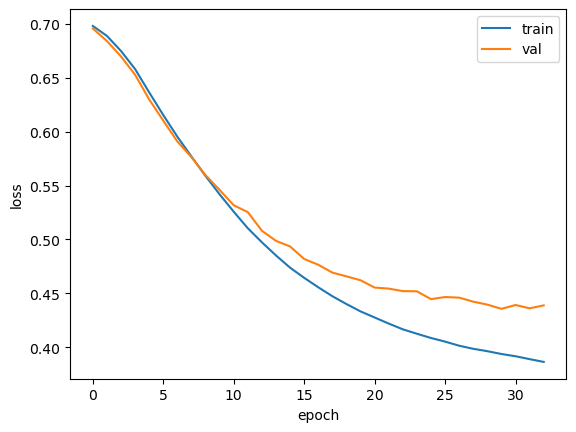

In [21]:
"""
Epoch 33/200
313/313 [==============================] - 6s 18ms/step - loss: 0.3864 - accuracy: 0.8357 - val_loss: 0.4388 - val_accuracy: 0.8038
"""

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss') # 두 개의 loss를 출력해줌. loss, val_loss
plt.legend(['train', 'val']) # 색깔로 표시해줌.
plt.show()

# 단어 임베딩 사용하기